<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/8thWeekTasks/Irawan_Mardiansyah_Google_Colab_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Baca dataset sebagai DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/heart_failure_clinical_records_dataset.csv')

# Menampilkan statistik deskriptif
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

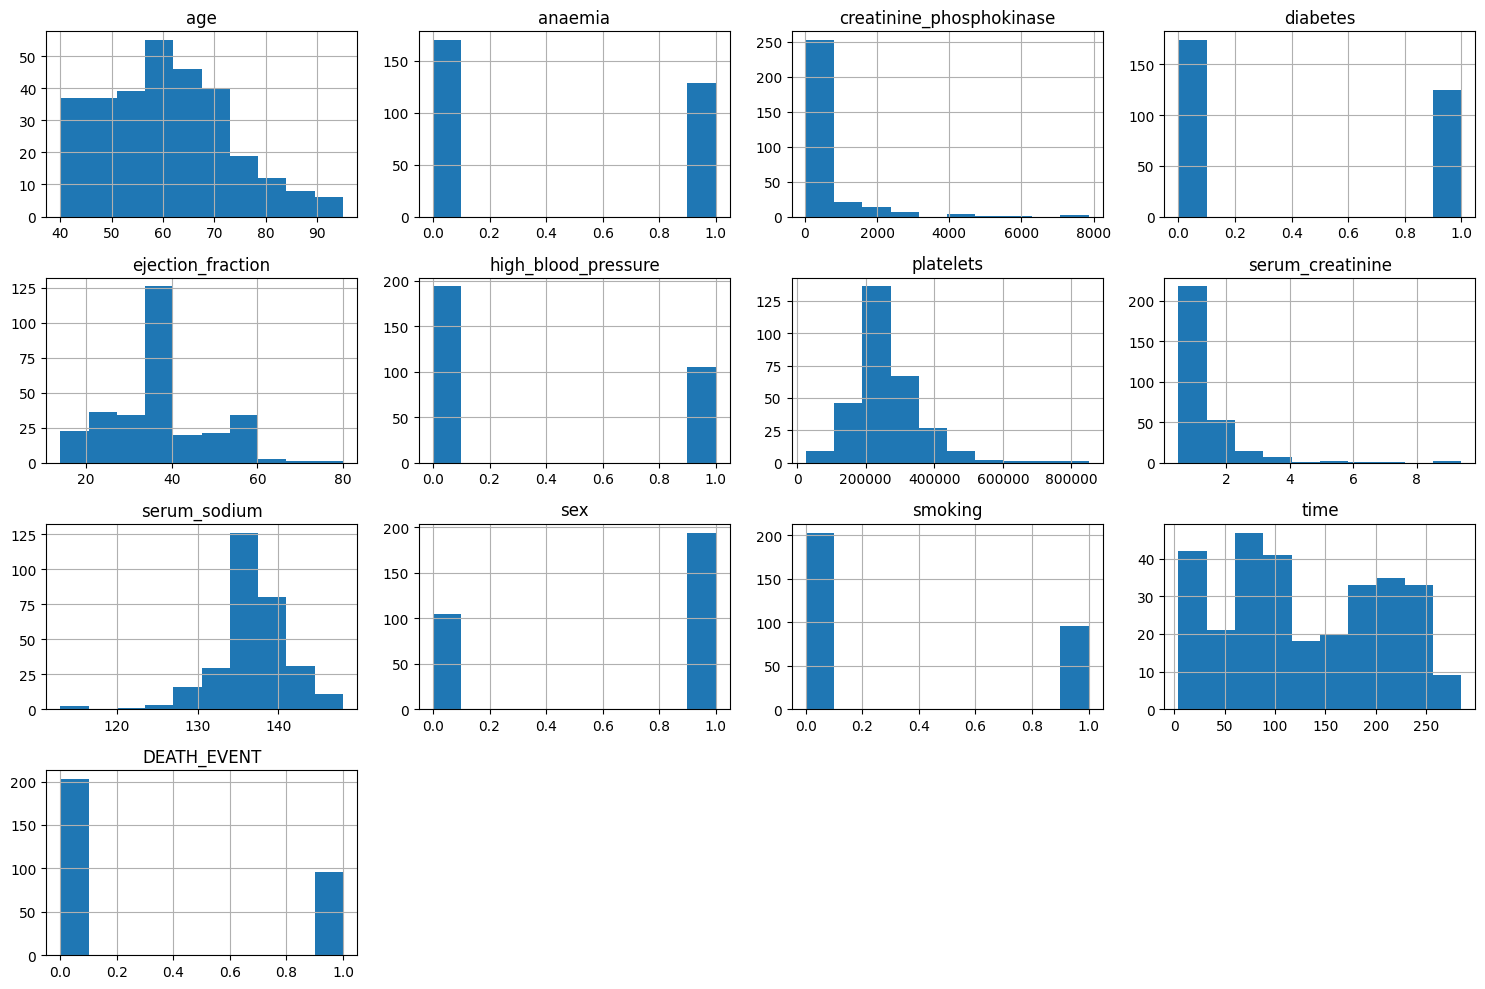

In [3]:
# Melihat distribusi data setiap fitur menggunakan histogram
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

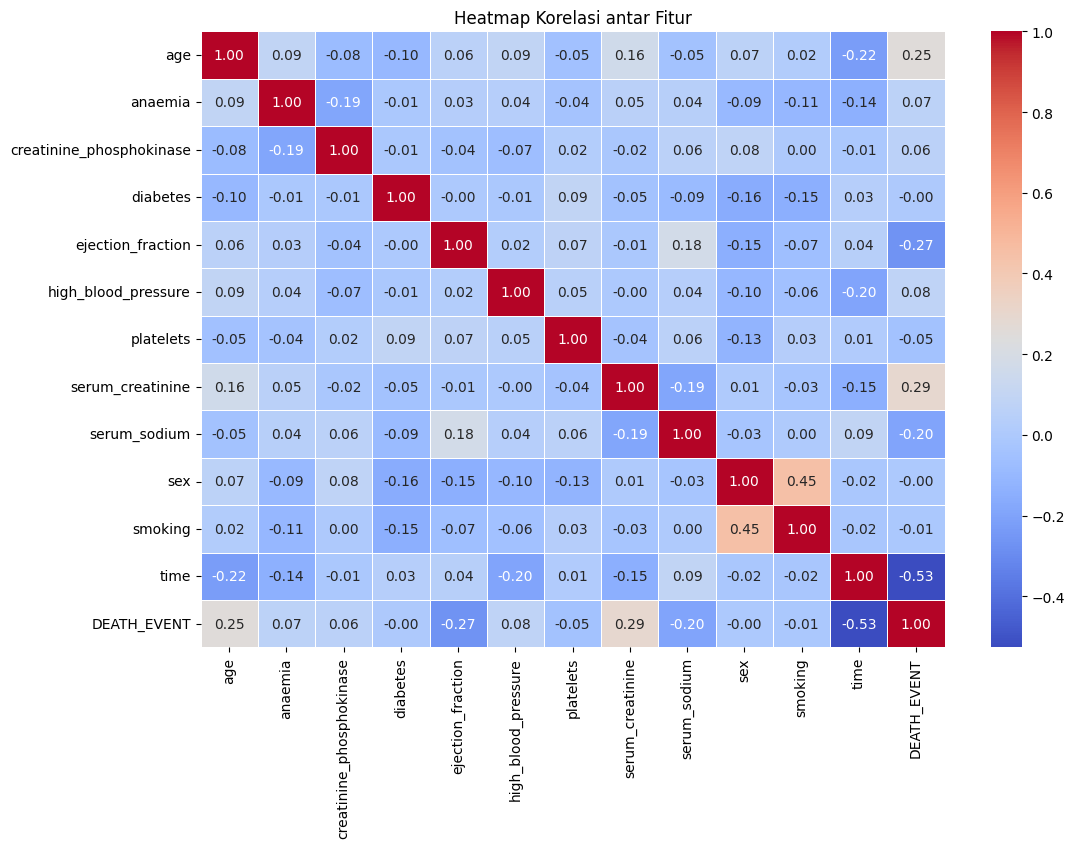

In [4]:
# Menghitung matriks korelasi antar fitur
correlation_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

In [5]:
# Pisahkan fitur dan label
X = df.drop('DEATH_EVENT', axis=1)  # Fitur
y = df['DEATH_EVENT']  # Label

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Latih model SVM dengan data latih
svm_model.fit(X_train, y_train)

# Lakukan prediksi dengan data uji
y_pred = svm_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Akurasi SVM:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi SVM: 0.75
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



In [ ]:
# Inisialisasi model SVM dengan beberapa setting hyperparameters
svm_models = [
    SVC(kernel='linear'),  # SVM linear
    SVC(kernel='rbf', C=1.0, gamma='scale'),  # SVM dengan kernel RBF
    SVC(kernel='poly', degree=3),  # SVM dengan kernel polinomial derajat 3
]

# Lakukan pelatihan dan evaluasi untuk setiap model
for idx, model in enumerate(svm_models, start=1):
    # Latih model dengan cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Evaluasi model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)

    # Tampilkan hasil evaluasi
    print("Model SVM ke-", idx)
    print("Akurasi (Rata-rata cross-validation):", scores.mean())
    print("Laporan Klasifikasi:\n", report)
    print("-" * 50)